In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.5.3'

### DataFrame 구조
- data - index(raw) - column(column)

In [3]:
num_list = [10, 20, 30, 40, 50]
pd.DataFrame(data=num_list)

,0
0,10
1,20
2,30
3,40
4,50


In [4]:
double_list = [
            [1000, '과자','2019-12-31','반품'],
            [2000, '음료', '2020-03-02', '정상'],
            [3000, '아이스크림', '2020-02-03','정상'],
            [1000,'과자','2019-12-31','반품']
            ]
pd.DataFrame(data=double_list)

,0,1,2,3
0,1000,과자,2019-12-31,반품
1,2000,음료,2020-03-02,정상
2,3000,아이스크림,2020-02-03,정상
3,1000,과자,2019-12-31,반품


In [5]:
double_colums = ['가격','종류','판매일자','반품여부']
df_saledays = pd.DataFrame(data=double_list, columns=double_colums)
df_saledays

,가격,종류,판매일자,반품여부
0,1000,과자,2019-12-31,반품
1,2000,음료,2020-03-02,정상
2,3000,아이스크림,2020-02-03,정상
3,1000,과자,2019-12-31,반품


In [6]:
type(df_saledays) #데이터 타입

pandas.core.frame.DataFrame

In [7]:
df_saledays.columns, type(df_saledays.columns), list(df_saledays.columns) # colums 정보 # 컬럼 type #컬렁명을 리스트로 반환

(Index(['가격', '종류', '판매일자', '반품여부'], dtype='object'),
 pandas.core.indexes.base.Index,
 ['가격', '종류', '판매일자', '반품여부'])

In [8]:
df_saledays.index # RangeIndex이면 for문 가능 # index : 행의 식별자 

RangeIndex(start=0, stop=4, step=1)

In [9]:
df_saledays.values # 값만 출력

array([[1000, '과자', '2019-12-31', '반품'],
       [2000, '음료', '2020-03-02', '정상'],
       [3000, '아이스크림', '2020-02-03', '정상'],
       [1000, '과자', '2019-12-31', '반품']], dtype=object)

In [10]:
df_saledays_dropcal = df_saledays.drop(columns=['종류', '판매일자']) # 컬럼 삭제 
# df_saledays.drop(columns=['종류', '판매일자'], inplace=True) #inplace=True 완전히 반영 지정한 df 값이 변화함

In [11]:
df_saledays_dropcal # 컬럼삭제를 했지만 값은 변화없음 /inplace=True를 사용했다면 반영

,가격,반품여부
0,1000,반품
1,2000,정상
2,3000,정상
3,1000,반품


#### 필터 
- and - &, or - |

In [12]:
# condition = (df_saledays_dropcal['반품여부'] == '정상')
condition = (df_saledays_dropcal['가격'] >= 2500)
df_saledays_dropcal.loc[condition]

,가격,반품여부
2,3000,정상


In [13]:
(df_saledays_dropcal['가격'] >= 2500) | (df_saledays_dropcal['가격'] <= 1000) # 특벙 범위 선택

0     True
1    False
2     True
3     True
Name: 가격, dtype: bool

In [14]:
(df_saledays_dropcal['반품여부'] == '정상') & (df_saledays_dropcal['가격'] >= 2500)

0    False
1    False
2     True
3    False
dtype: bool

#### 요약
- df.pivot_table(index='', values='')

In [15]:
# df_saledays_dropcal.pivot_table(index='반품여부', values='가격') # 자동으로 평균값
# pd.pivot_table(data=df_saledays_dropcal,index='반품여부', values='가격')
df_saledays_dropcal.pivot_table(index='반품여부', values='가격')

,가격
반품여부,
반품,1000
정상,2500


In [16]:
import numpy as np
df_saledays_dropcal.pivot_table(index='반품여부', values='가격', aggfunc=np.min)

,가격
반품여부,
반품,1000
정상,2000


In [18]:
df_saledays.pivot_table(index=['반품여부', '종류'], values='가격', aggfunc=[np.sum, np.min, np.size]) # aggfunc의 여러개의 함수 동시에 적용

sum  amin size
              가격    가격   가격
반품여부 종류                    
반품   과자     2000  1000    2
정상   아이스크림  3000  3000    1
     음료     2000  2000    1

In [19]:
df_saledays  #df_saledays['가격'].mean() #평균값 확인

,가격,종류,판매일자,반품여부
0,1000,과자,2019-12-31,반품
1,2000,음료,2020-03-02,정상
2,3000,아이스크림,2020-02-03,정상
3,1000,과자,2019-12-31,반품


#### apply 함수

In [20]:
def mean_substraction(cell_value) : 
    result = 1750 - cell_value  # 가격 평균 - 개별값
    return result

In [21]:
mean_substraction(750)

1000

In [22]:
df_saledays['가격'].apply(mean_substraction) #함수 불러오기

0     750
1    -250
2   -1250
3     750
Name: 가격, dtype: int64

#### 컬럼 추가

In [44]:
df_saledays['가격차이'] = df_saledays['가격'].apply(mean_substraction) # 각 cell당 평균 차이값
# 해당 결과 값을 '가격차이' 컬럼에 담도록

In [45]:
df_saledays

,가격,종류,판매일자,반품여부,가격차이
0,1000,과자,2019-12-31,반품,750
1,2000,음료,2020-03-02,정상,-250
2,3000,아이스크림,2020-02-03,정상,-1250
3,1000,과자,2019-12-31,반품,750


### Series
- index -data

In [24]:
single_data = [0.1, 0.2, 0.3, 0.4, 0.5]
series_floats = pd.Series(data=single_data)
series_floats

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
dtype: float64

In [25]:
type(series_floats)

pandas.core.series.Series

### 통계 수치 표현 

In [26]:
import numpy as np

In [27]:
arr = np.array([6, 4, 1, 3, 5, 3, 10, 7, 9])
arr

array([ 6,  4,  1,  3,  5,  3, 10,  7,  9])

In [28]:
# 평균, 합계
np.mean(arr), np.sum(arr)

(5.333333333333333, 48)

In [29]:
# 중앙값
np.median(arr)

5.0

In [30]:
# 최소값, 최대값
print(np.min(arr), np.max(arr))

1 10


In [31]:
# 분산, 표준편차
np.var(arr), np.std(arr)

(7.777777777777778, 2.788866755113585)

#### IQR

In [32]:
import numpy as np
data = np.array([44, 32, 53, 75, 36, 45, 25, 49, 46, 28])

In [33]:
Q1 = np.percentile(data, 25)

In [34]:
Q3 = np.percentile(data, 75)

In [35]:
Q1, Q3

(33.0, 48.25)

In [36]:
Q3 - Q1 # boxplot의 범위

15.25

In [37]:
np.median(data) # 중앙값

44.5

In [38]:
import seaborn as sns

<Axes: >

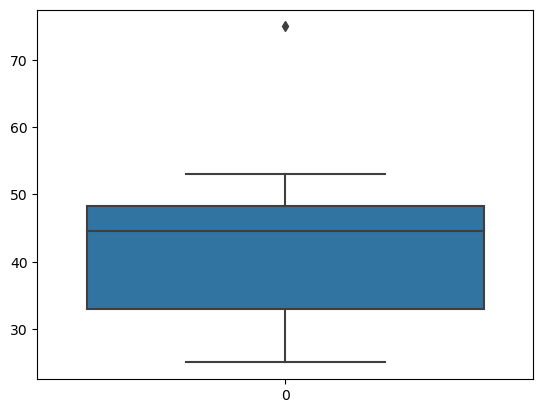

In [39]:
sns.boxplot(data)